In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [118]:
df = pd.read_csv("11-iris.csv")

In [119]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [121]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [122]:
df.shape

(150, 6)

In [123]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [124]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [125]:
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

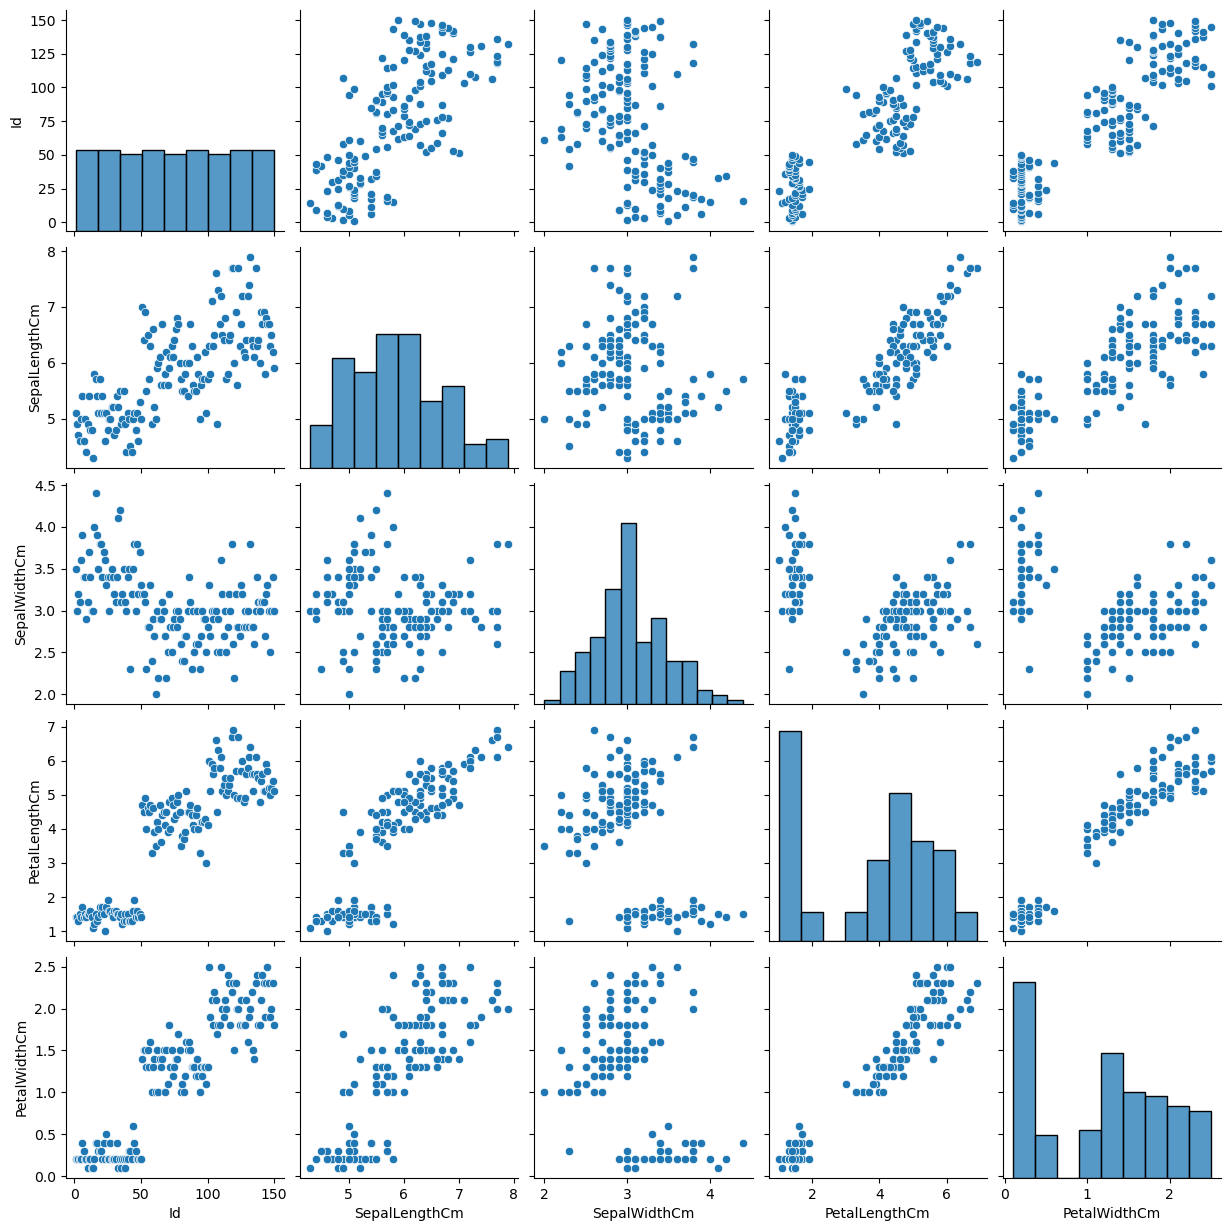

In [126]:
sns.pairplot(df)
plt.show()

In [127]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

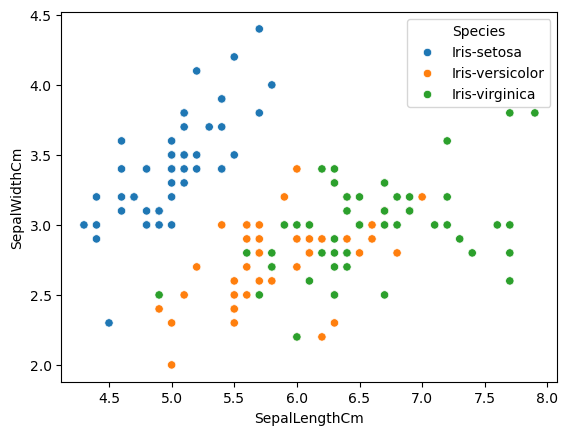

In [128]:
sns.scatterplot(x = df["SepalLengthCm"], y = df["SepalWidthCm"], hue = df["Species"])
plt.show()

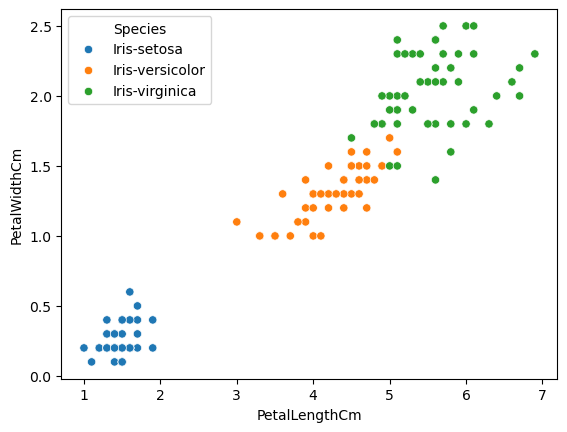

In [129]:
sns.scatterplot(x = df["PetalLengthCm"], y = df["PetalWidthCm"], hue = df["Species"])
plt.show()

In [130]:
df = df.drop("Id", axis = 1)

In [131]:
from sklearn.preprocessing import LabelEncoder

In [132]:
label_encoder = LabelEncoder()

In [133]:
df["Species"] = label_encoder.fit_transform(df["Species"])

In [134]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [135]:
X = df.drop("Species", axis = 1)
y = df["Species"]

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 15)

In [137]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [138]:
from sklearn.naive_bayes import GaussianNB

In [139]:
gnb = GaussianNB()

In [140]:
gnb.fit(X_train_scaled, y_train)
y_pred = gnb.predict(X_test_scaled)

In [141]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [142]:
print("confusion matrix: \n", confusion_matrix(y_test, y_pred))
print("classification report: \n", classification_report(y_test, y_pred))
print("accuracy score: ", accuracy_score(y_test, y_pred))

confusion matrix: 
 [[12  0  0]
 [ 0 14  0]
 [ 0  0 12]]
classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

accuracy score:  1.0


In [143]:
from sklearn.linear_model import LogisticRegression
regression = LogisticRegression()
regression.fit(X_train_scaled, y_train)
y_pred1 = regression.predict(X_test_scaled)

In [144]:
print("confusion matrix: \n", confusion_matrix(y_test, y_pred1))
print("classification report: \n", classification_report(y_test, y_pred1))
print("accuracy score: ", accuracy_score(y_test, y_pred1))

confusion matrix: 
 [[12  0  0]
 [ 0 14  0]
 [ 0  0 12]]
classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

accuracy score:  1.0


In [145]:
regression2 = LogisticRegression()
penalty = ["l1", "l2", "elasticnet"]
c_values = [100, 10, 1, 0.1, 0.01]
solver = ["newton-cg", "lbfgs", "liblinear", "sag", "saga", "newton-cholesky"]
params = dict(penalty = penalty, C = c_values, solver = solver)

In [146]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [147]:
cv = StratifiedKFold()
grid = GridSearchCV(estimator = regression2, param_grid = params, scoring = "accuracy", cv = cv, n_jobs = -1 )

In [148]:
import warnings
warnings.filterwarnings("ignore")
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga', 'newton-cholesky']},
             scoring='accuracy')

In [149]:
grid.best_params_

{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}

In [150]:
print(grid.best_score_)

0.9640316205533598


In [151]:
y_pred2 = grid.predict(X_test_scaled)

In [152]:
score = accuracy_score(y_test, y_pred2)
print("score: ", score)
print(classification_report(y_test, y_pred2))
print("confusion matrix: \n ", confusion_matrix(y_test, y_pred2))

score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

confusion matrix: 
  [[12  0  0]
 [ 0 14  0]
 [ 0  0 12]]


In [153]:
from sklearn.metrics import roc_auc_score

In [154]:
model_prob = grid.predict_proba(X_test_scaled)

In [155]:
model_prob

array([[9.99010334e-01, 9.89666261e-04, 2.08298026e-13],
       [5.28744591e-03, 9.72625349e-01, 2.20872055e-02],
       [6.09274758e-03, 9.69873339e-01, 2.40339139e-02],
       [9.92542896e-01, 7.45710370e-03, 2.92620050e-12],
       [9.76037303e-01, 2.39626971e-02, 6.25914727e-12],
       [5.09498923e-03, 9.63240136e-01, 3.16648745e-02],
       [7.99465229e-09, 8.17634547e-04, 9.99182357e-01],
       [8.66402466e-02, 9.13191932e-01, 1.67821677e-04],
       [2.95647002e-02, 9.51565983e-01, 1.88693166e-02],
       [3.70405416e-06, 3.90172994e-02, 9.60978997e-01],
       [6.30315578e-05, 3.07113791e-01, 6.92823177e-01],
       [1.66794115e-03, 9.91383398e-01, 6.94866121e-03],
       [8.14215989e-04, 9.93596313e-01, 5.58947091e-03],
       [7.11688160e-03, 9.91847630e-01, 1.03548825e-03],
       [8.25765794e-07, 7.50077368e-03, 9.92498401e-01],
       [9.76608020e-01, 2.33919801e-02, 9.91002953e-12],
       [2.14711989e-02, 9.75583566e-01, 2.94523469e-03],
       [1.31086787e-08, 1.77258

In [156]:
roc_auc = roc_auc_score(y_test, model_prob, multi_class="ovr")

In [158]:
print(roc_auc)

1.0


In [165]:
from sklearn.svm import SVC

In [167]:
linear=SVC(kernel='linear')
linear.fit(X_train_scaled,y_train)
y_pred3=linear.predict(X_test_scaled)
print(classification_report(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

[[12  0  0]
 [ 0 14  0]
 [ 0  0 12]]


In [170]:
poly=SVC(kernel='poly')
poly.fit(X_train_scaled,y_train)
y_pred4=poly.predict(X_test_scaled)
print(classification_report(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.88      1.00      0.93        14
           2       1.00      0.83      0.91        12

    accuracy                           0.95        38
   macro avg       0.96      0.94      0.95        38
weighted avg       0.95      0.95      0.95        38

[[12  0  0]
 [ 0 14  0]
 [ 0  2 10]]


In [171]:
rbf=SVC(kernel='rbf')
rbf.fit(X_train_scaled,y_train)
y_pred5=rbf.predict(X_test_scaled)
print(classification_report(y_test,y_pred5))
print(confusion_matrix(y_test,y_pred5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

[[12  0  0]
 [ 0 14  0]
 [ 0  0 12]]


In [173]:
sigmoid=SVC(kernel='sigmoid')
sigmoid.fit(X_train_scaled,y_train)
y_pred6=sigmoid.predict(X_test_scaled)
print(classification_report(y_test,y_pred6))
print(confusion_matrix(y_test,y_pred6))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.92      0.86      0.89        14
           2       0.85      0.92      0.88        12

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38

[[12  0  0]
 [ 0 12  2]
 [ 0  1 11]]
